# Bayesian inference of the parameter of a Bernoulli distribution using JAGS

In this R Jupyter notebook, the parameter of a Bernoulli distribution is inferred using a Bayesian approach using JAGS.

In [1]:
# Import the required libraries
library(MCMCvis)
library(rjags)

# Ensure the figures are easy to view in the notebook
options(repr.plot.width=10, repr.plot.height=6)

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs



## Generate samples

In [2]:
# Probability of a 1 appearing
theta = 0.2

# Number of samples
N = 20

# Generate the samples
samples = rbinom(N, 1, theta)
samples

[1] 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1

In [3]:
# Calculate the empirical value of theta
theta_prime = sum(samples) / N
theta_prime

[1] 0.35

## Infer the parameter of a Bernoulli Distribution

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 20
   Unobserved stochastic nodes: 1
   Total graph size: 24

Initializing model



Warning message in MCMCsummary(samp, round = 2):
"Rhat statistic cannot be calculated with one chain. NAs inserted."


,mean,sd,2.5%,50%,97.5%,Rhat,n.eff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
theta,0.36,0.1,0.18,0.36,0.57,NA,20000


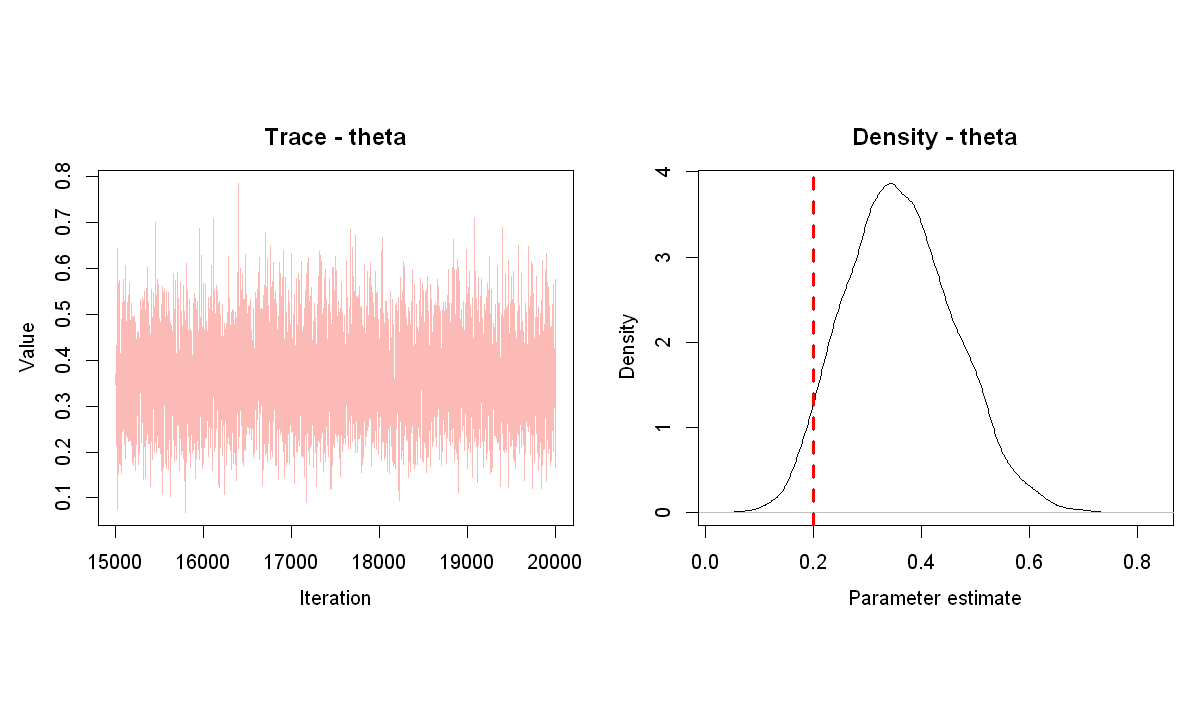

In [4]:
# Infer the parameters of the Bernoulli distribution using JAGS
model_string = "
model {
    # Prior
    theta ~ dbeta(a, b)  # probability of a 1 appearing

    # Likelihood
    for (i in 1:N) {
        y[i] ~ dbern(theta)
    }
}
"

model = jags.model(textConnection(model_string),
                   data = list(y=samples, N=length(samples), a=1, b=1))

update(model, 10000, progress.bar="none")

samp <- coda.samples(model, 
                     variable.names=c("theta"), 
                     n.iter=20000, 
                     progress.bar="none")

# Show a summary of the variables
MCMCsummary(samp, round = 2)

MCMCtrace(samp, 
          gv=theta,
          pdf=FALSE)